In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/Weather Data.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [5]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: >

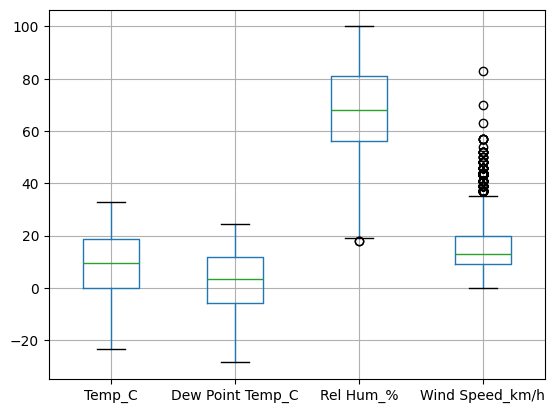

In [11]:
df.boxplot(column=['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h'])

In [12]:
columns_to_check = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Outliers in {column}:")
    display(outliers)

Outliers in Temp_C:


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather


Outliers in Dew Point Temp_C:


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather


Outliers in Rel Hum_%:


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
1984,2012-03-23 16:00:00,15.5,-9.0,18,22,48.3,101.6,Cloudy
3066,2012-05-07 18:00:00,20.7,-4.4,18,13,48.3,101.0,Mostly Cloudy


Outliers in Wind Speed_km/h:


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy
32,2012-01-02 08:00:00,1.9,-3.3,68,39,24.1,99.14,Mostly Cloudy
33,2012-01-02 09:00:00,1.8,-3.7,67,44,24.1,99.14,Mostly Cloudy
34,2012-01-02 10:00:00,1.5,-4.1,66,43,24.1,99.18,Mostly Cloudy
36,2012-01-02 12:00:00,1.7,-6.2,56,48,24.1,99.21,Mainly Clear
...,...,...,...,...,...,...,...,...
8679,2012-12-27 15:00:00,-5.0,-6.2,91,37,0.6,100.37,"Snow,Blowing Snow"
8680,2012-12-27 16:00:00,-4.5,-6.2,88,37,2.0,100.44,"Snow,Blowing Snow"
8684,2012-12-27 20:00:00,-3.7,-5.3,89,37,16.1,100.58,Snow
8749,2012-12-30 13:00:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy


In [14]:
weather_counts = df['Weather'].value_counts()
print("Unique weather conditions and their counts:   ")
display(weather_counts)

Unique weather conditions and their counts:   


,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [17]:
# Apply log transformation
df['Wind Speed_LogTransformed'] = np.log1p(df['Wind Speed_km/h'])

# Display the first few rows with the new column
display(df.head())

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Wind Speed_Standardized,Wind Speed_LogTransformed
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,-1.259808,1.609438
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,-1.259808,1.609438
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",-0.914513,2.079442
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",-1.029611,1.945910
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,-0.914513,2.079442


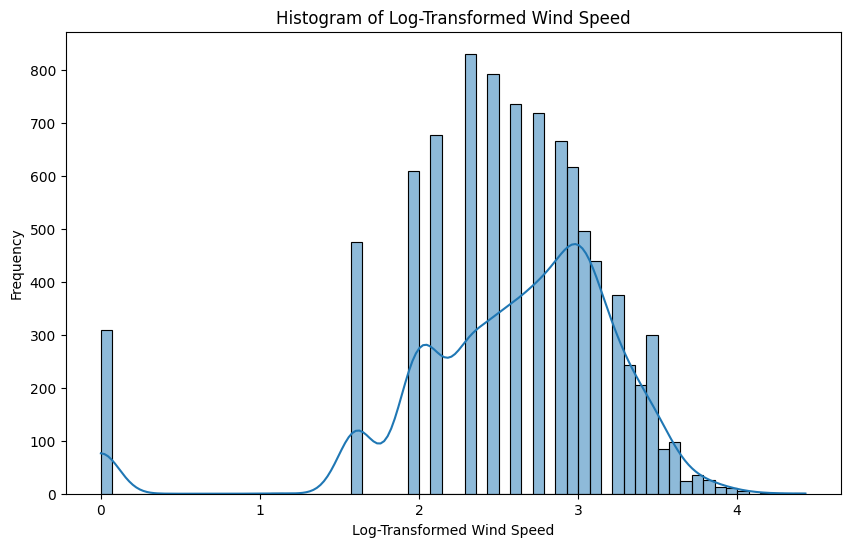

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Wind Speed_LogTransformed'], kde=True)
plt.title('Histogram of Log-Transformed Wind Speed')
plt.xlabel('Log-Transformed Wind Speed')
plt.ylabel('Frequency')
plt.show()

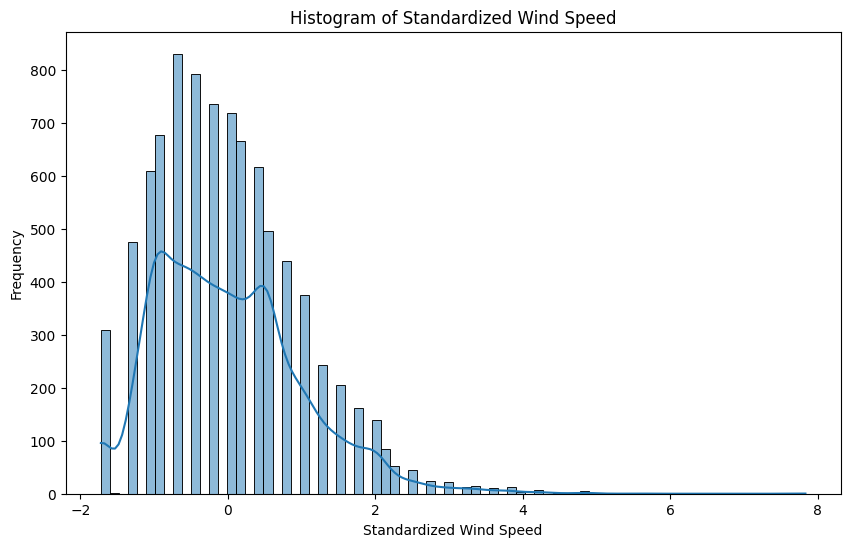

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Wind Speed_Standardized'], kde=True)
plt.title('Histogram of Standardized Wind Speed')
plt.xlabel('Standardized Wind Speed')
plt.ylabel('Frequency')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

# Standardize the 'Wind Speed_km/h' column
scaler = StandardScaler()
df['Wind Speed_Standardized'] = scaler.fit_transform(df[['Wind Speed_km/h']])

# Display the first few rows with the new column
display(df.head())

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Wind Speed_Standardized
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,-1.259808
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,-1.259808
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",-0.914513
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",-1.029611
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,-0.914513


In [20]:
# Calculate the average temperature
average_temp = df['Temp_C'].mean()
print(f"The average temperature is: {average_temp:.2f} °C")

# Find the hottest day(s)
hottest_day = df.loc[df['Temp_C'].idxmax()]
print("\nThe hottest day(s):")
display(hottest_day)

# Find the coldest day(s)
coldest_day = df.loc[df['Temp_C'].idxmin()]
print("\nThe coldest day(s):")
display(coldest_day)

The average temperature is: 8.80 °C

The hottest day(s):


,4143
Date/Time,2012-06-21 15:00:00
Temp_C,33.0
Dew Point Temp_C,19.0
Rel Hum_%,44
Wind Speed_km/h,24
Visibility_km,24.1
Press_kPa,100.2
Weather,Mainly Clear
Wind Speed_Standardized,1.042164
Wind Speed_LogTransformed,3.218876



The coldest day(s):


,344
Date/Time,2012-01-15 08:00:00
Temp_C,-23.3
Dew Point Temp_C,-28.5
Rel Hum_%,62
Wind Speed_km/h,7
Visibility_km,24.1
Press_kPa,102.45
Weather,Clear
Wind Speed_Standardized,-0.914513
Wind Speed_LogTransformed,2.079442


# Task
Analyze the weather dataset by plotting the temperature over time, visualizing the distribution of pressure and relative humidity, and creating a correlation heatmap of numerical features.

## Time series plot of temperature

### Subtask:
Plot the `Temp_C` column against `Date/Time` to visualize temperature trends over time.


**Reasoning**:
Create a line plot to visualize the temperature trend over time.



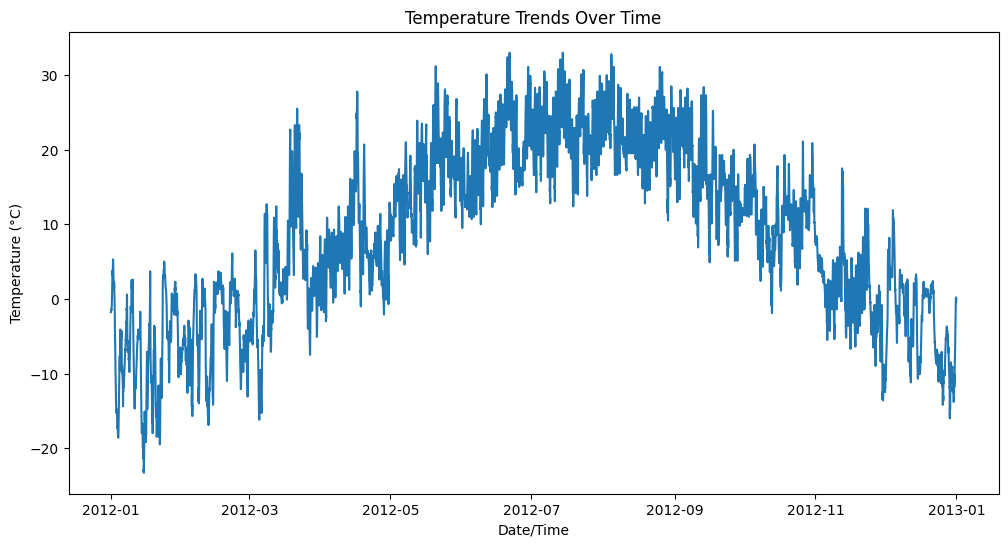

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date/Time'], df['Temp_C'])
plt.title('Temperature Trends Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.show()

## Distribution plot of pressure

### Subtask:
Create a histogram or box plot to show the distribution of the `Press_kPa` column.


**Reasoning**:
Generate a histogram of the `Press_kPa` column to visualize its distribution, including a KDE curve, and set appropriate labels and a title for the plot.



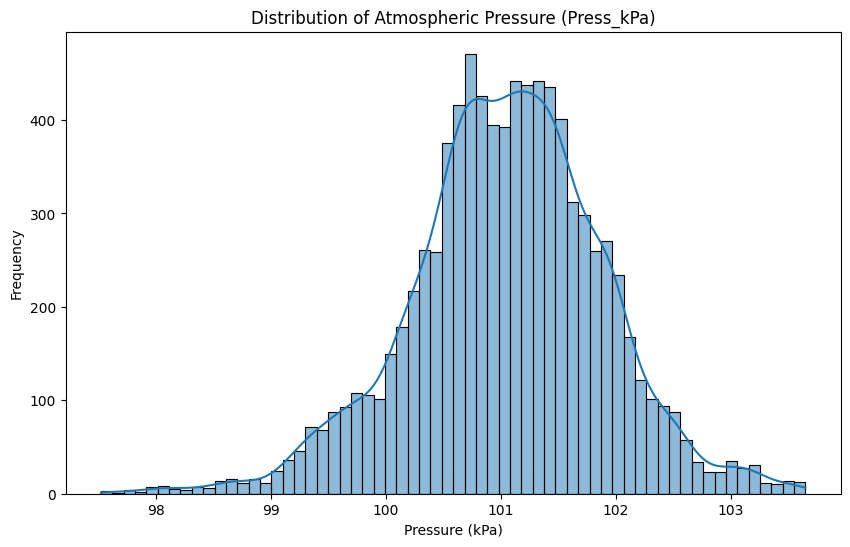

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Press_kPa'], kde=True)
plt.title('Distribution of Atmospheric Pressure (Press_kPa)')
plt.xlabel('Pressure (kPa)')
plt.ylabel('Frequency')
plt.show()

## Distribution plot of relative humidity

### Subtask:
Create a histogram or box plot to show the distribution of the `Rel Hum_%` column.


**Reasoning**:
Create a histogram to visualize the distribution of the 'Rel Hum_%' column with a KDE curve and appropriate labels.



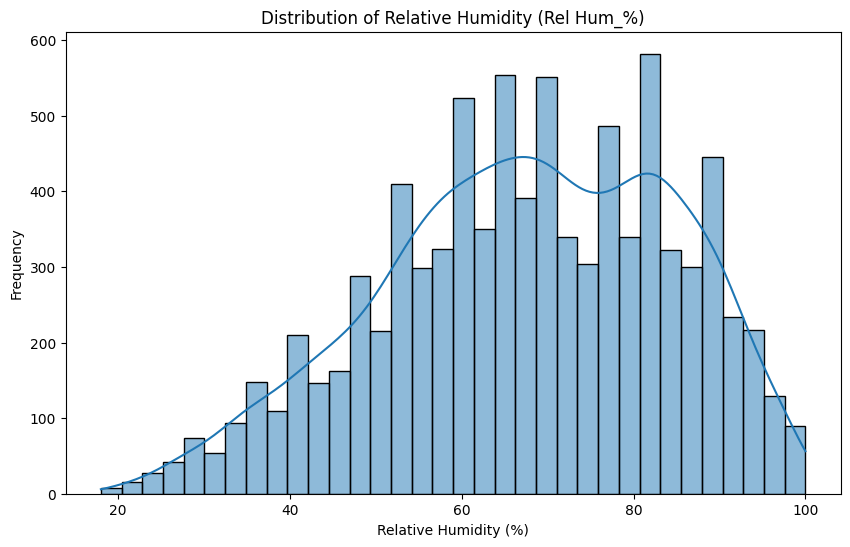

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rel Hum_%'], kde=True)
plt.title('Distribution of Relative Humidity (Rel Hum_%)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.show()

## Correlation heatmap

### Subtask:
Calculate the correlation matrix for all numerical columns and visualize it using a heatmap.


**Reasoning**:
Select numerical columns, calculate the correlation matrix, and create a heatmap with annotations and a title.



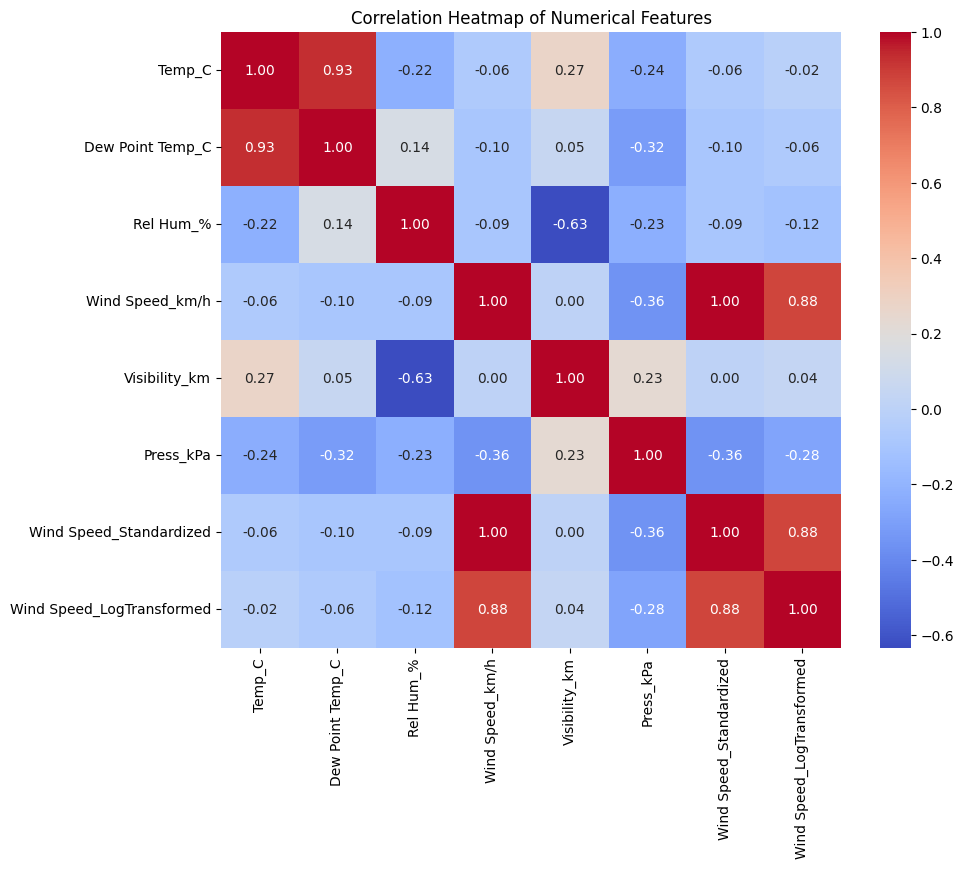

In [25]:
numerical_cols = df.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Summary:

### Data Analysis Key Findings
*   A time series plot of temperature over time was generated, showing the trends and fluctuations in temperature across the dataset's time period.
*   A histogram with a Kernel Density Estimate (KDE) curve was created to visualize the distribution of atmospheric pressure (`Press_kPa`).
*   A histogram with a KDE curve was also generated to visualize the distribution of relative humidity (`Rel Hum_%`).
*   A correlation heatmap of the numerical features in the dataset was produced, showing the pairwise correlations between temperature, pressure, and relative humidity.


# Task
Analyze the weather data by creating a time series plot of temperature, distribution plots for pressure and relative humidity, and a correlation heatmap of numerical features. Optionally, perform time-series forecasting on temperature or pressure.

## Forecasting (optional)

### Subtask:
Use time-series models like ARIMA to predict the temperature or pressure for the next few hours or days.


**Reasoning**:
Select 'Temp_C' as the target variable and prepare the data for ARIMA model by setting the 'Date/Time' as index and selecting the target variable.



In [26]:
temp_data = df.set_index('Date/Time')['Temp_C']
display(temp_data.head())

,Temp_C
Date/Time,
2012-01-01 00:00:00,-1.8
2012-01-01 01:00:00,-1.8
2012-01-01 02:00:00,-1.8
2012-01-01 03:00:00,-1.5
2012-01-01 04:00:00,-1.5


**Reasoning**:
Train an ARIMA model on the temperature data and make predictions for the next 24 hours.



In [27]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (example order, needs tuning)
# A common approach is to start with a simple order like (5,1,0) for non-seasonal data
model = ARIMA(temp_data, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 24 hours
forecast_steps = 24
forecast = model_fit.forecast(steps=forecast_steps)

print("Forecast for the next 24 hours:")
display(forecast)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Forecast for the next 24 hours:


,predicted_mean
2013-01-01 00:00:00,-0.063399
2013-01-01 01:00:00,0.001623
2013-01-01 02:00:00,0.075294
2013-01-01 03:00:00,0.076318
2013-01-01 04:00:00,0.085616
2013-01-01 05:00:00,0.099953
2013-01-01 06:00:00,0.099618
2013-01-01 07:00:00,0.097972
2013-01-01 08:00:00,0.098706
2013-01-01 09:00:00,0.097507


**Reasoning**:
Plot the original temperature data and the forecast to visualize the model's predictions.



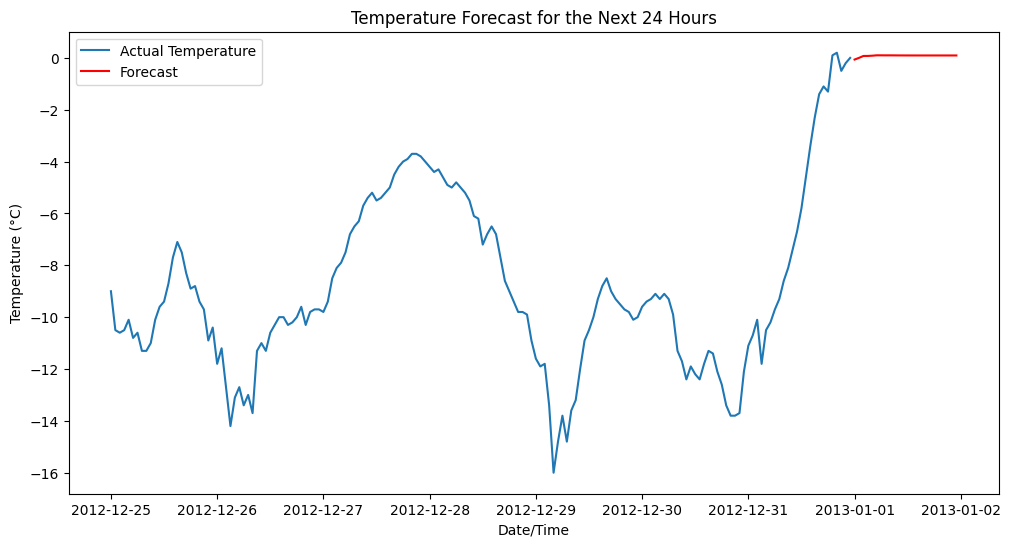

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(temp_data.index[-24*7:], temp_data[-24*7:], label='Actual Temperature') # Plot last 7 days for better visualization
plt.plot(forecast.index, forecast, color='red', label='Forecast')
plt.title('Temperature Forecast for the Next 24 Hours')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The temperature data was successfully prepared as a time series with 'Date/Time' as the index.
*   An ARIMA(5, 1, 0) model was trained on the temperature data to forecast the next 24 hours.
*   A visualization was generated showing the last 7 days of actual temperature and the 24-hour temperature forecast.


In [29]:
df.to_csv('weather_data_processed.csv', index=False)
